# Size Filter vs Precision/Recall

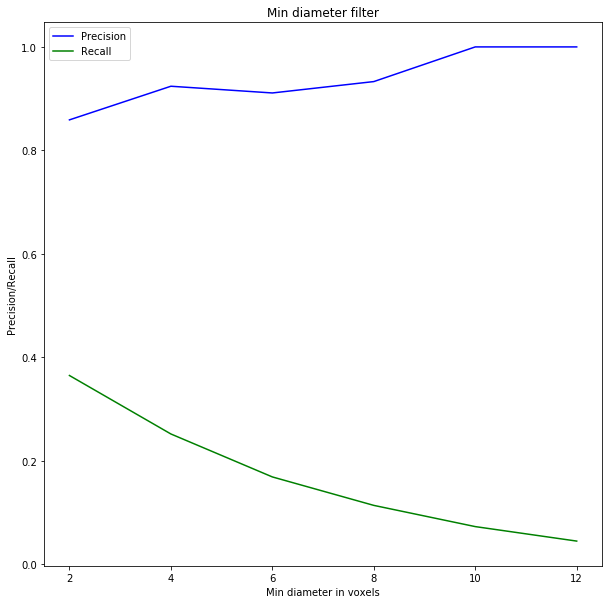

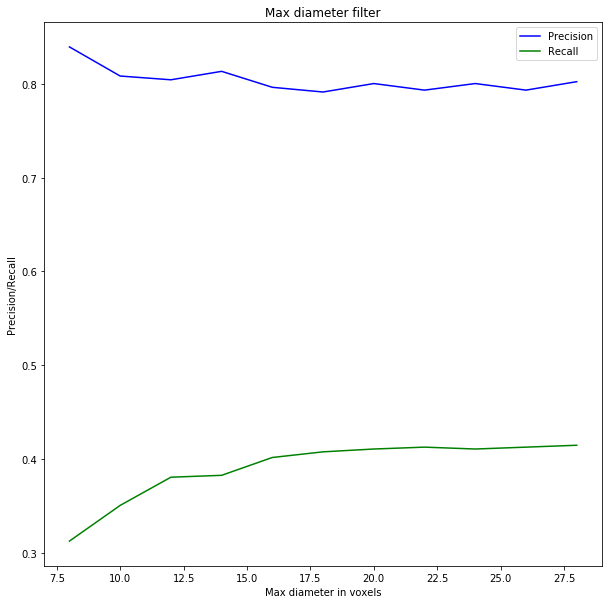

In [21]:
%reload_ext autoreload
%autoreload 2
from IPython.core.pylabtools import figsize
figsize(10, 10)

from tifffile import imread, imsave
from src.BlobDetector import BlobDetector
from src import util
import matplotlib.pyplot as plt
import numpy as np
from src.BlobMetrics import BlobMetrics

exp_name = 'cell_detection_9'
data_source = 'COLM' if int(exp_name.split('_')[2]) <= 3 else 'laVision'

ground_truth_path = 'data/s3617/annotations/{}.csv'.format(exp_name)
ground_truth = util.get_list_from_csv(ground_truth_path)

input_tif_path = './data/s3617/tifs/{}.tiff'.format(exp_name)

img = imread(input_tif_path)

detector = BlobDetector(input_tif_path, data_source=data_source)

min_diameters = np.arange(2, 14, 2)
max_diameters = np.arange(8, 30, 2)

min_diam_pr_points = []
min_diam_rc_points = []

# for min_diameter in min_diameters:
#     print("Min diameter", min_diameter)
#     centroids = detector.get_blob_centroids(min_diameter=min_diameter)
#     metrics = BlobMetrics(ground_truth, centroids, euclidean_distance_threshold=12)
#     min_diam_pr_points.append((min_diameter, metrics.precision()))
#     min_diam_rc_points.append((min_diameter, metrics.recall()))

# print(min_diam_pr_points)
# print(min_diam_rc_points)

min_diam_pr_points = [(2, 0.859), (4, 0.924), (6, 0.911), (8, 0.933), (10, 1.0), (12, 1.0)]
min_diam_rc_points = [(2, 0.365), (4, 0.252), (6, 0.169), (8, 0.114), (10, 0.073), (12, 0.045)]

plt.plot([p[0] for p in min_diam_pr_points], [p[1] for p in min_diam_pr_points], color='b', label='Precision')
plt.plot([p[0] for p in min_diam_rc_points], [p[1] for p in min_diam_rc_points], color='g', label='Recall')
plt.title('Min diameter filter')
plt.xlabel('Min diameter in voxels')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

# max_diam_pr_points = []
# max_diam_rc_points = []

# for max_diameter in max_diameters:
#     print('Max diameter', max_diameter)
#     centroids = detector.get_blob_centroids(max_diameter=max_diameter)
#     metrics = BlobMetrics(ground_truth, centroids, euclidean_distance_threshold=12)
#     max_diam_pr_points.append((max_diameter, metrics.precision()))
#     max_diam_rc_points.append((max_diameter, metrics.recall()))

# print(max_diam_pr_points)
# print(max_diam_rc_points)

max_diam_pr_points = [(8, 0.839), (10, 0.808), (12, 0.804), (14, 0.813), (16, 0.796), (18, 0.791), (20, 0.8), (22, 0.793), (24, 0.8), (26, 0.793), (28, 0.802)]
max_diam_rc_points = [(8, 0.313), (10, 0.351), (12, 0.381), (14, 0.383), (16, 0.402), (18, 0.408), (20, 0.411), (22, 0.413), (24, 0.411), (26, 0.413), (28, 0.415)]

plt.plot([p[0] for p in max_diam_pr_points], [p[1] for p in max_diam_pr_points], color='b', label='Precision')
plt.plot([p[0] for p in max_diam_rc_points], [p[1] for p in max_diam_rc_points], color='g', label='Recall')
plt.title('Max diameter filter')
plt.xlabel('Max diameter in voxels')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

